<a href="https://colab.research.google.com/github/MizanMustakim/DataScienceProject_6thSemesterBIT/blob/main/dateClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

In [4]:
df1 = pd.read_excel("/content/drive/MyDrive/Data_Scinece_project/Date_Fruit_Datasets.xlsx")
df1.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [6]:
df1.shape

(898, 35)

In [7]:
df_group = df1.groupby(by="Class").mean()
df_group

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
Class,,,,,,,,,,,,,,,,,,,,,
BERHI,405213.446154,2321.504669,815.370329,634.656000,0.621369,716.904234,0.993957,407666.153846,0.766549,1.288515,...,1.237302,3.805326,5.732585,6.671926,-4.139439e+10,-3.796279e+10,-3.325089e+10,49.352677,48.263368,44.324366
DEGLET,233743.357143,1831.441983,680.222427,440.273151,0.756589,543.476547,0.984319,237428.908163,0.760827,1.550036,...,-0.222301,2.644296,2.642760,2.742700,-3.555533e+10,-3.061273e+10,-2.876142e+10,59.580324,55.605459,54.638908
DOKOL,145147.421569,1436.321190,537.843773,342.949578,0.763276,427.546873,0.987206,147026.990196,0.755143,1.565859,...,-0.142743,3.070927,3.051433,2.751065,-2.370817e+10,-2.213381e+10,-1.897899e+10,61.817167,60.260382,56.393073
IRAQI,433983.583333,2411.046333,836.104518,664.326222,0.595040,742.701772,0.993076,436990.513889,0.763890,1.261814,...,1.072739,5.975487,7.677246,6.215456,-2.909566e+10,-3.064288e+10,-3.057680e+10,40.237440,41.758233,41.056210
ROTANA,387115.867470,2376.310050,832.475543,599.880924,0.686942,701.009730,0.980255,394846.084337,0.736674,1.391999,...,-0.172949,2.763720,2.769380,2.903195,-6.212994e+10,-5.455981e+10,-5.089050e+10,61.717520,58.280622,56.329015
SAFAVI,334367.783920,2329.186030,881.385573,488.488877,0.826394,650.104639,0.973426,343399.924623,0.686883,4.483646,...,0.626492,7.819265,10.384683,4.684819,-9.085305e+09,-1.099945e+10,-1.459300e+10,25.676704,29.007776,33.765713
SOGAY,286872.957447,2051.277354,755.978483,492.676919,0.751864,602.329610,0.971239,295203.734043,0.731430,1.536905,...,0.236660,2.516620,2.728207,2.871002,-3.588859e+10,-2.791138e+10,-2.645158e+10,53.883697,47.810700,47.089709


In [8]:
df1.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


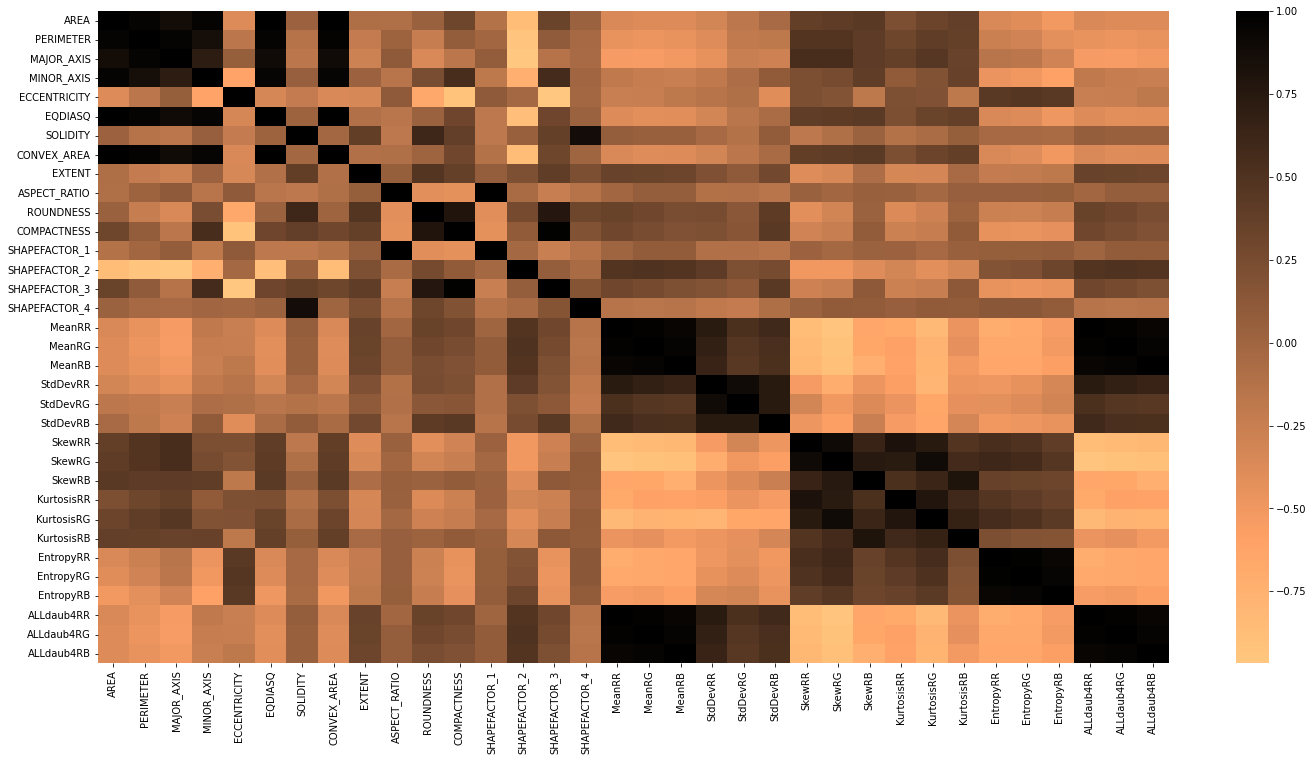

In [9]:
plt.figure(figsize=(24,12))
sns.heatmap(df1.corr(),cmap="copper_r", annot=False)
plt.show()

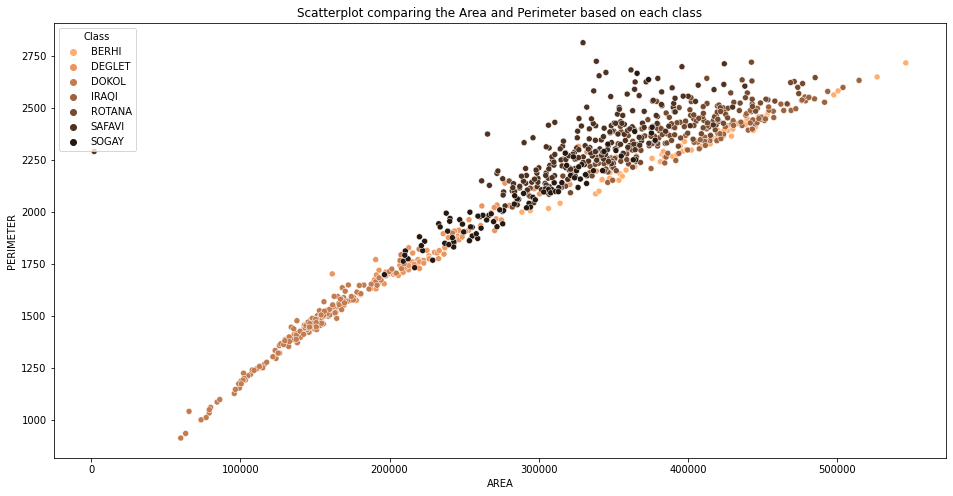

In [10]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df1['AREA'], y=df1['PERIMETER'], hue=df1['Class'], palette='copper_r', legend='auto')
plt.title("Scatterplot comparing the Area and Perimeter based on each class")
plt.show()

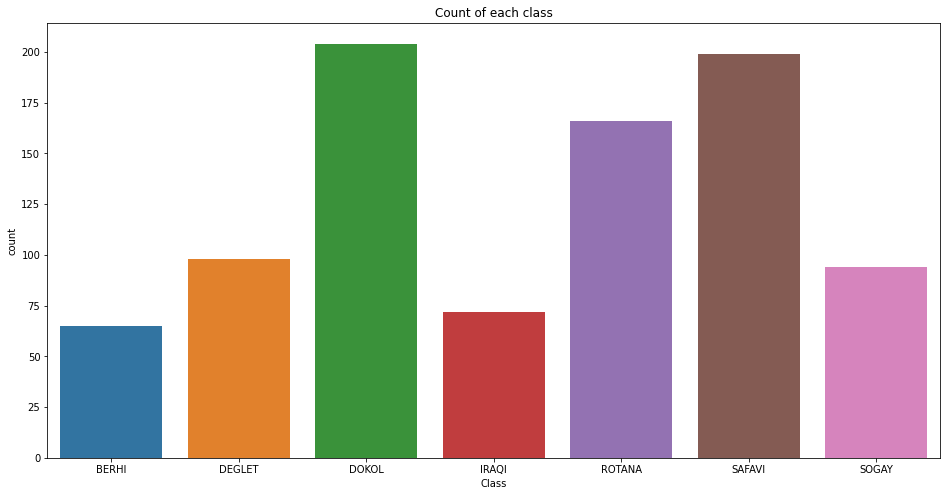

In [11]:
plt.figure(figsize=(16,8))
sns.countplot(data = df1, x="Class")
plt.title("Count of each class")
plt.show()

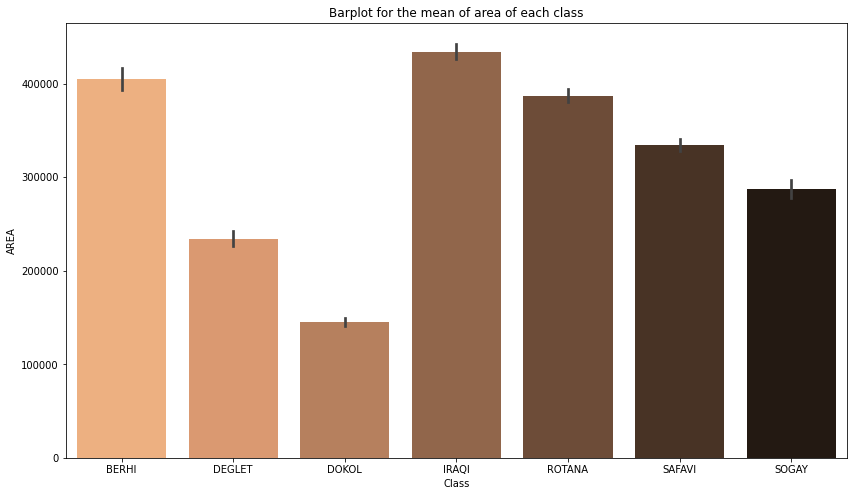

In [12]:
plt.figure(figsize=(14,8))
sns.barplot(x=df1["Class"], y=df1["AREA"], palette="copper_r")
plt.title("Barplot for the mean of area of each class")
plt.show()

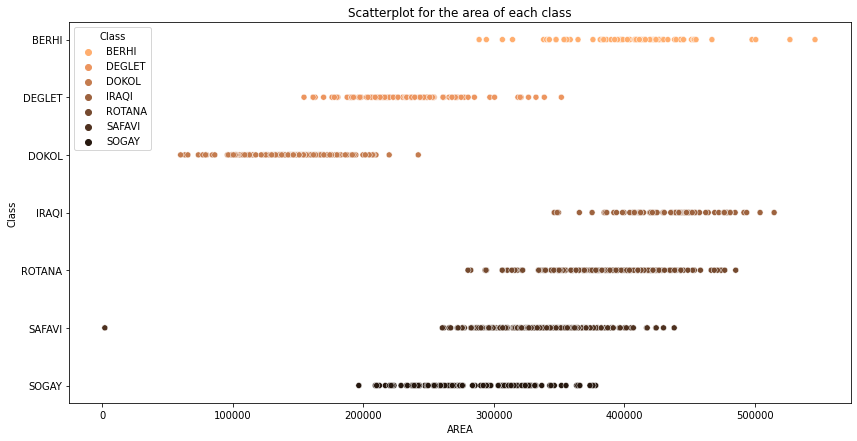

In [13]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=df1["AREA"], y=df1["Class"], hue=df1["Class"], palette="copper_r")
plt.title("Scatterplot for the area of each class")
plt.show()

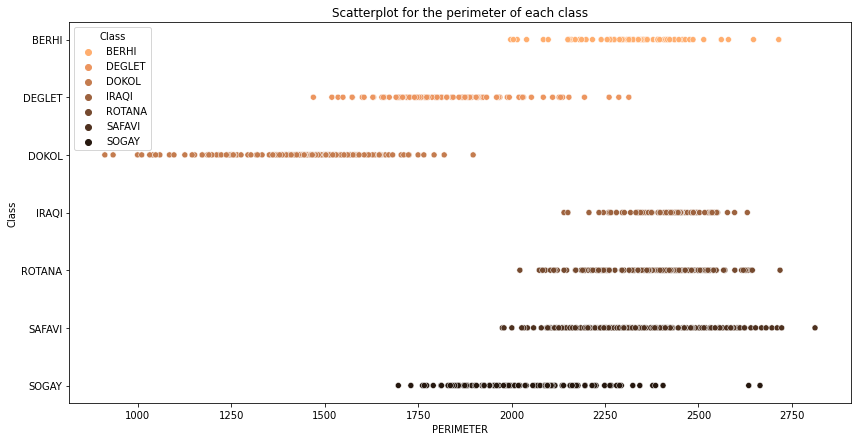

In [14]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=df1["PERIMETER"], y=df1["Class"], hue=df1["Class"], palette="copper_r")
plt.title("Scatterplot for the perimeter of each class")
plt.show()

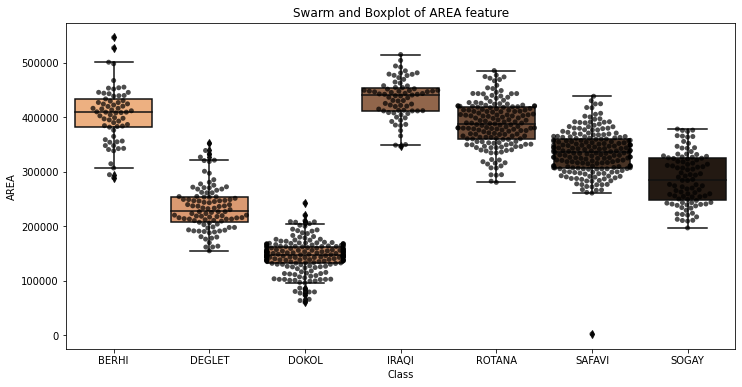

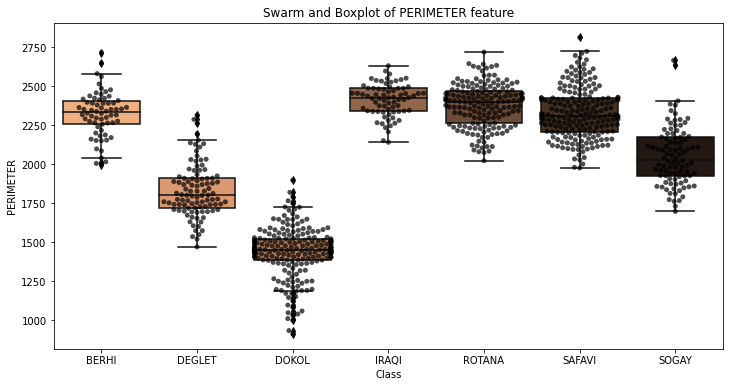

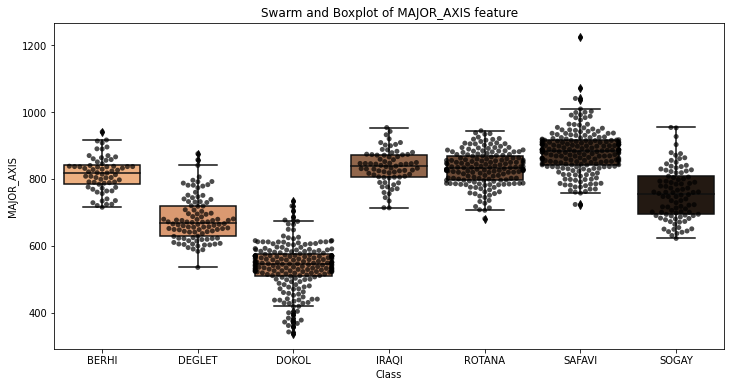

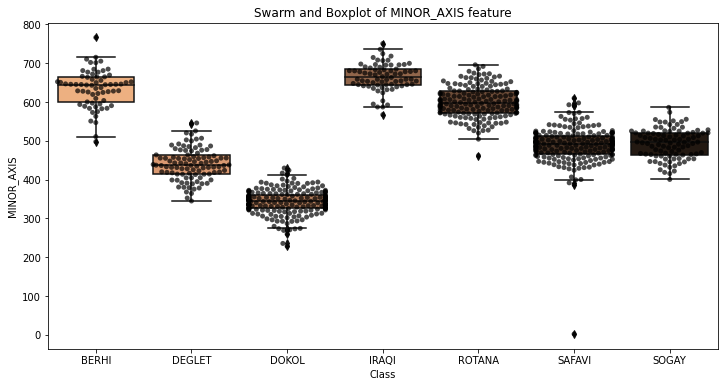

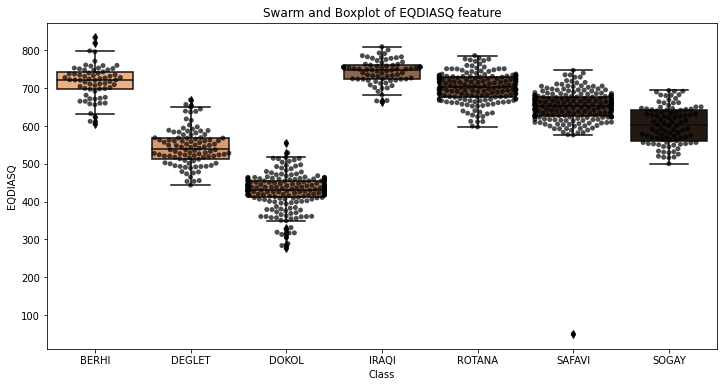

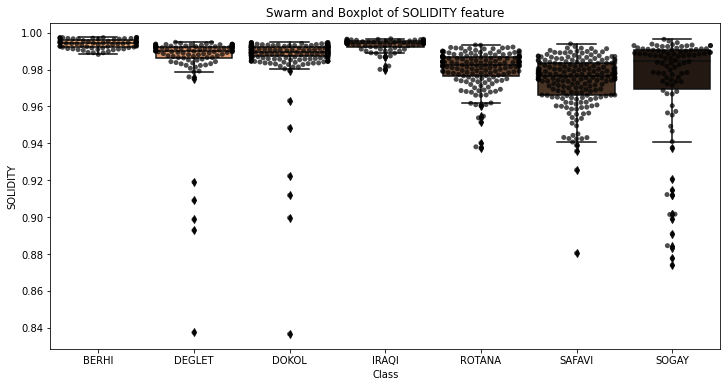

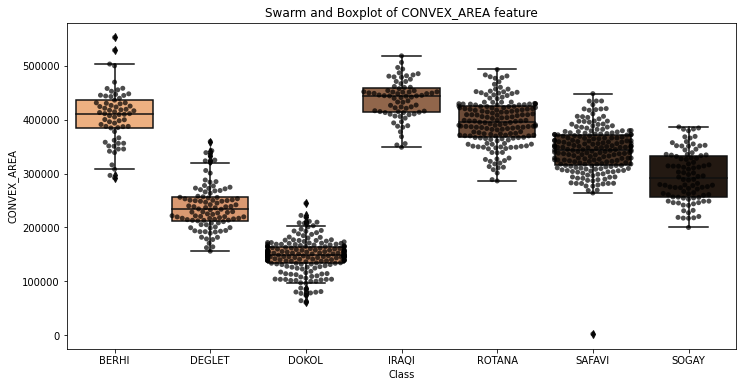

In [15]:
feat = ["AREA","PERIMETER","MAJOR_AXIS","MINOR_AXIS","EQDIASQ","SOLIDITY", "CONVEX_AREA"]
for feature in feat: 
    plt.figure(figsize=(12,6))
    sns.swarmplot(x=df1["Class"], y=df1[feature], color="black", alpha=0.7)
    sns.boxplot(x=df1["Class"], y=df1[feature], palette='copper_r')
    plt.title(f"Swarm and Boxplot of {feature} feature")
    plt.show()

In [16]:
def outlier_clean(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    iqr = abs(q1-q3)

    max = q3 + 1.5 * iqr
    min = q1 + 1.5 * iqr

    data = np.where(data > max, max, np.where(data < min, min, data))

    return data

In [17]:
col = ["PERIMETER", "MAJOR_AXIS", "SOLIDITY"]

for i in col:
    df1[i] = outlier_clean(df1[i])

df1[col]

,PERIMETER,MAJOR_AXIS,SOLIDITY
0,2721.529112,967.4163,0.998287
1,2721.529112,967.4163,0.998287
2,2721.529112,967.4163,0.998287
3,2721.529112,967.4163,0.998287
4,2721.529112,967.4163,0.998287
...,...,...,...
893,2721.529112,967.4163,0.998287
894,2721.529112,967.4163,0.998287
895,2721.529112,967.4163,0.998287
896,2721.529112,967.4163,0.998287


In [18]:
df1["Class"] = df1["Class"].astype("category")
df1["Class_cate"] = df1["Class"].cat.codes

df1["Class"].unique()

['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY']
Categories (7, object): ['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY']

In [19]:
X = df1.drop(["Class", "Class_cate"], axis=1)
Y = df1["Class_cate"]

print("Samples of each class:\n")
Y.value_counts()

Samples of each class:



2    204
5    199
4    166
1     98
6     94
3     72
0     65
Name: Class_cate, dtype: int64

In [20]:
Y = to_categorical(Y)

# class_labels = {
#     'DOKOL': 0,     
#     'SAFAVI': 1,   
#     'ROTANA': 2,   
#     'DEGLET': 3,     
#     'SOGAY': 4,     
#     'IRAQI': 5,      
#     'BERHI': 6  
# }

# y_transformed = to_categorical(Y.map(class_labels))
# y_transformed[:5]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

print("Shape of train input values: ", x_train.shape)
print("Shape of train output values: ", y_train.shape)
print("Shape of test input values: ", x_test.shape)
print("Shape of test output values: ", y_test.shape)

Shape of train input values:  (718, 34)
Shape of train output values:  (718, 7)
Shape of test input values:  (180, 34)
Shape of test output values:  (180, 7)


In [22]:
sm = SMOTE()
x_train, y_train= sm.fit_resample(x_train, y_train)

print("Samples of each class:\n")
split = np.sum(y_train, axis=0, dtype='uint8')
print('train dataset')
for i in range(7): print('class', i, ":", split[i])

split = np.sum(y_test, axis=0, dtype='uint8')
print('\n\ntest dataset')
for i in range(7): print('class', i, ":", split[i])

Samples of each class:

train dataset
class 0 : 166
class 1 : 166
class 2 : 166
class 3 : 166
class 4 : 166
class 5 : 166
class 6 : 166


test dataset
class 0 : 12
class 1 : 20
class 2 : 50
class 3 : 10
class 4 : 35
class 5 : 33
class 6 : 20


In [23]:
print("After oversampling Shape of train input values: ", x_train.shape)
print("After oversampling Shape of train output values: ", y_train.shape)
print("Shape of test input values: ", x_test.shape)
print("Shape of test output values: ", y_test.shape)

After oversampling Shape of train input values:  (1162, 34)
After oversampling Shape of train output values:  (1162, 7)
Shape of test input values:  (180, 34)
Shape of test output values:  (180, 7)


In [24]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(1028, activation="tanh", input_shape=[x_train.shape[1]]),
                                    tf.keras.layers.Dropout(0.4),
                                    tf.keras.layers.Dense(512, activation="relu"),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dense(7, activation="softmax")

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1028)              35980     
                                                                 
 dropout (Dropout)           (None, 1028)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               526848    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 7)                 903       
                                                                 
Total params: 629,395
Trainable params: 629,395
Non-trai

In [25]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer = "adam",
    metrics=[tf.keras.metrics.AUC()])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='auc',
                               min_delta=0,
                               patience=4,
                               verbose=0)


# Train the Model
history = model.fit(x_train, y_train, 
                    epochs=1000, 
                    validation_data=(x_test, y_test),
                    batch_size=5,
                    callbacks=[early_stopping])

Epoch 1/1000
233/233 [==============================] - 3s 9ms/step - loss: 1.7677 - auc: 0.7282 - val_loss: 1.4996 - val_auc: 0.7717
Epoch 2/1000
233/233 [==============================] - 2s 8ms/step - loss: 1.4754 - auc: 0.7982 - val_loss: 1.5384 - val_auc: 0.7735
Epoch 3/1000
233/233 [==============================] - 2s 8ms/step - loss: 1.3968 - auc: 0.8196 - val_loss: 1.4234 - val_auc: 0.8059
Epoch 4/1000
233/233 [==============================] - 2s 8ms/step - loss: 1.3592 - auc: 0.8326 - val_loss: 1.3264 - val_auc: 0.8383
Epoch 5/1000
233/233 [==============================] - 2s 8ms/step - loss: 1.3216 - auc: 0.8438 - val_loss: 1.3324 - val_auc: 0.8391
Epoch 6/1000
233/233 [==============================] - 2s 8ms/step - loss: 1.2775 - auc: 0.8524 - val_loss: 1.2696 - val_auc: 0.8548
Epoch 7/1000
233/233 [==============================] - 2s 8ms/step - loss: 1.2970 - auc: 0.8505 - val_loss: 1.3137 - val_auc: 0.8547
Epoch 8/1000
233/233 [==============================] - 2s 8ms

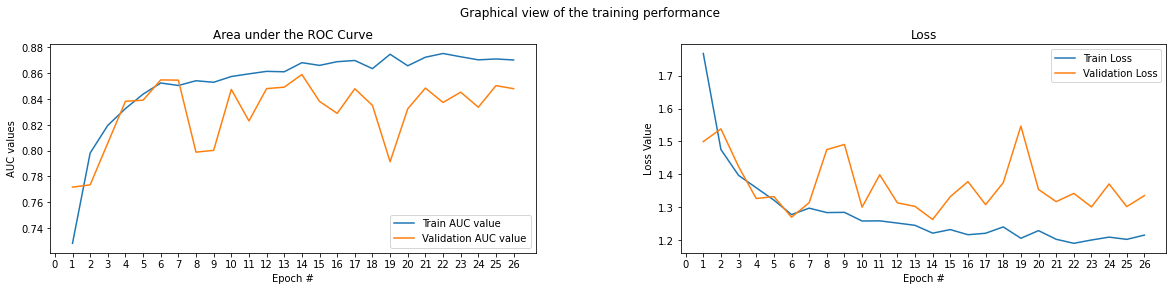

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
t = f.suptitle('Graphical view of the training performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,len(history.history["loss"])+1))
ax1.plot(epoch_list, history.history['auc'], label='Train AUC value')
ax1.plot(epoch_list, history.history['val_auc'], label='Validation AUC value')
ax1.set_xticks(np.arange(0, len(history.history["loss"])+1, 1))
ax1.set_ylabel('AUC values')
ax1.set_xlabel('Epoch #')
ax1.set_title('Area under the ROC Curve')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, len(history.history["loss"])+1, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch #')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")